In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [6]:
corolla=pd.read_csv("D:\\ExcelR\\Assingments\\Multi Linear Regression\\ToyotaCorolla.csv",encoding='unicode_escape')


In [7]:
corolla

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [8]:
corolla_mod=corolla.loc[:,["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [9]:
corolla_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [10]:
corolla_mod[corolla_mod.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
corolla_mod.drop_duplicates(inplace=True)

In [12]:
corolla_mod.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


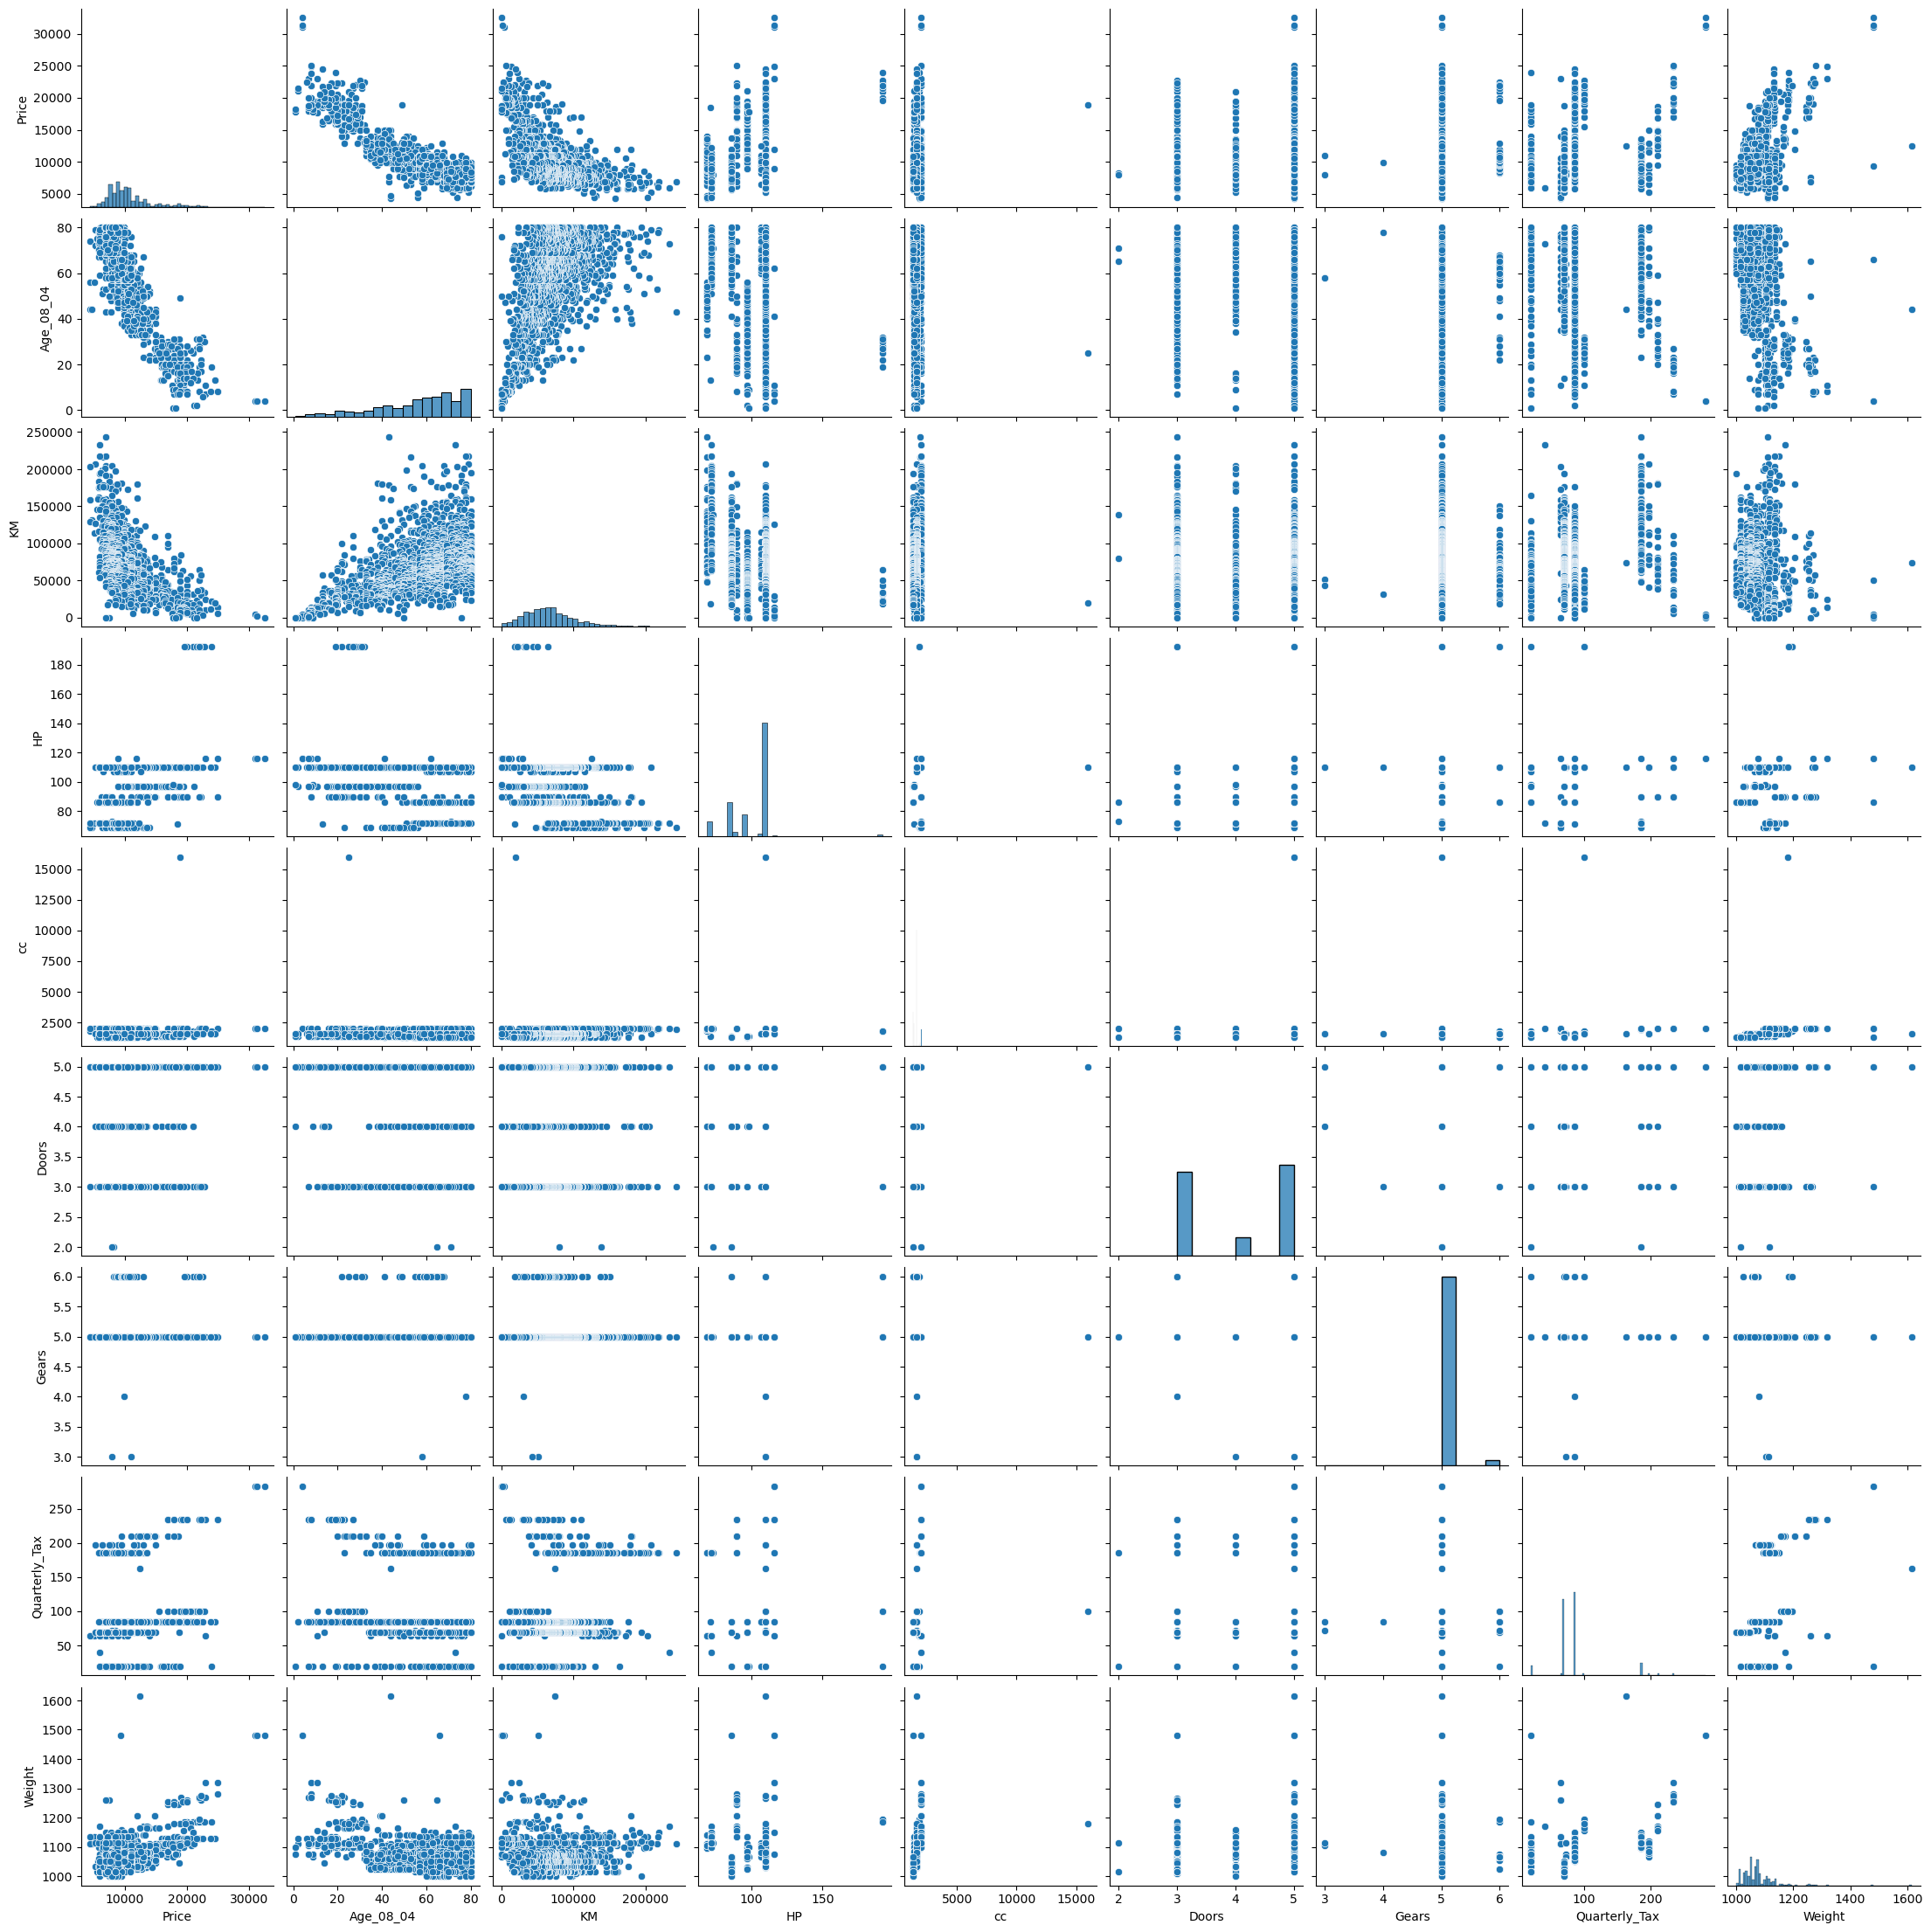

In [13]:
sns.pairplot(corolla_mod)

In [14]:
corolla_mod.Gears.value_counts()

Gears
5    1389
6      43
3       2
4       1
Name: count, dtype: int64

In [15]:
corolla_mod1=corolla_mod.copy()

In [16]:
corolla_mod1=corolla_mod1[(corolla_mod1.Gears!=3) & (corolla_mod1.Gears!=4)]

In [17]:
corolla_mod1.Doors.value_counts()

Doors
5    672
3    621
4    137
2      2
Name: count, dtype: int64

In [18]:
corolla_mod1=corolla_mod1[corolla_mod1.Doors!=2]

In [19]:
corolla_mod1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


<Axes: >

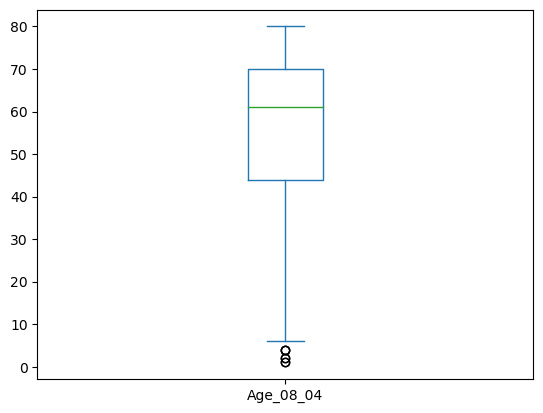

In [20]:
corolla_mod1.Age_08_04.plot(kind='box')

<Axes: xlabel='Age_08_04', ylabel='Density'>

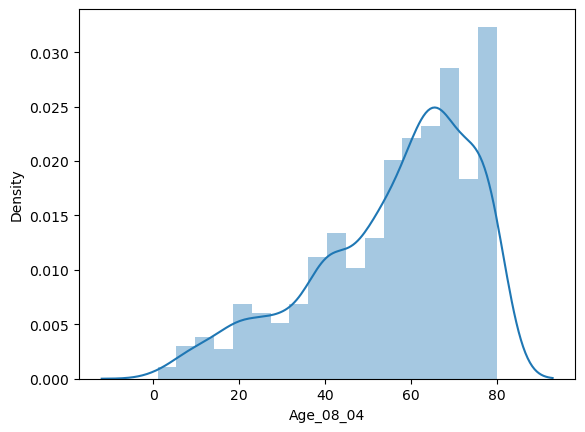

In [21]:
sns.distplot(corolla_mod1.Age_08_04)

<Axes: >

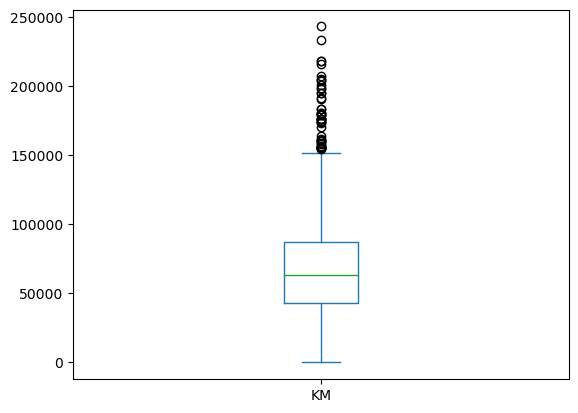

In [22]:
corolla_mod1.KM.plot(kind='box')

<Axes: >

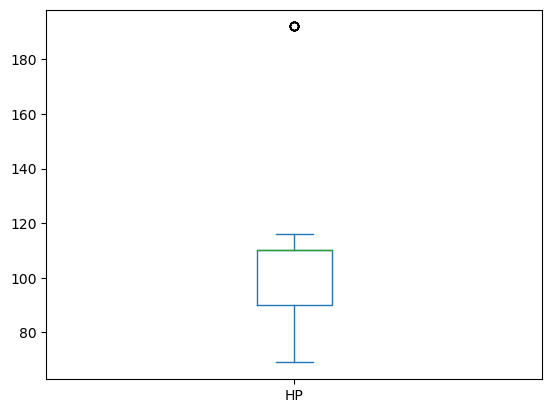

In [23]:
corolla_mod1.HP.plot(kind='box')

In [24]:
corolla_mod1[corolla_mod1.HP>180]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
8,21500,27,19700,192,1800,3,5,100,1185
10,20950,25,31461,192,1800,3,6,100,1185
11,19950,22,43610,192,1800,3,6,100,1185
12,19600,25,32189,192,1800,3,6,100,1185
13,21500,31,23000,192,1800,3,6,100,1185
14,22500,32,34131,192,1800,3,6,100,1185
15,22000,28,18739,192,1800,3,6,100,1185
16,22750,30,34000,192,1800,3,5,100,1185
49,21950,31,64982,192,1800,5,6,100,1195
53,21950,27,49866,192,1800,5,5,100,1195


In [25]:
corolla_mod1[corolla_mod1.HP>180].index

Index([8, 10, 11, 12, 13, 14, 15, 16, 49, 53, 141], dtype='int64')

In [26]:
corolla_mod1.loc[[8, 10, 11, 12, 13, 14, 15, 16, 49, 53, 141],'HP']=corolla_mod1[corolla_mod1.HP<180].HP.max()

<Axes: >

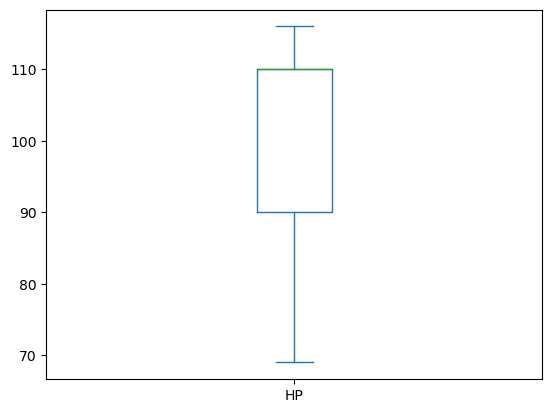

In [27]:
corolla_mod1.HP.plot(kind='box')

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


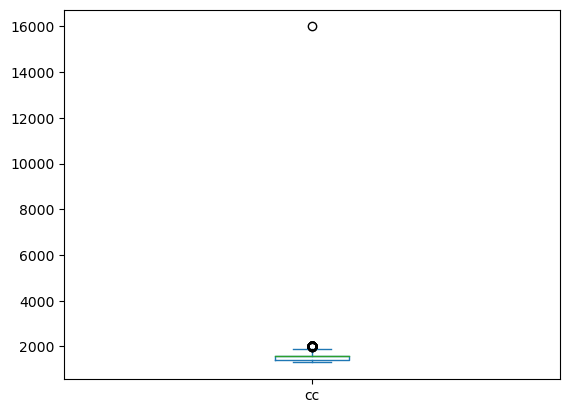

In [28]:
corolla_mod1.cc.plot(kind='box')
corolla_mod1[corolla_mod1.cc>14000]

In [29]:
m=corolla_mod1[corolla_mod1.cc<14000].cc.max()
m

2000

In [30]:
corolla_mod1.loc[80,'cc']=2000

<Axes: >

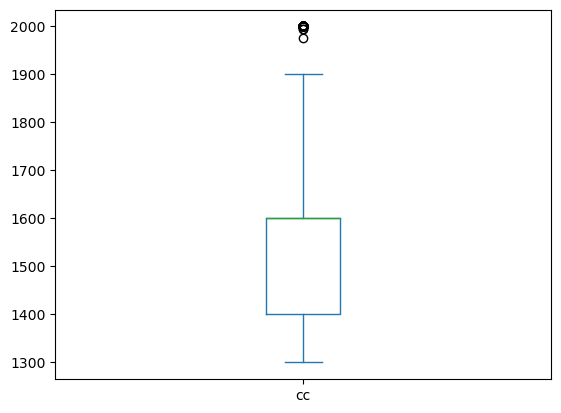

In [31]:
corolla_mod1.cc.plot(kind='box')

<Axes: >

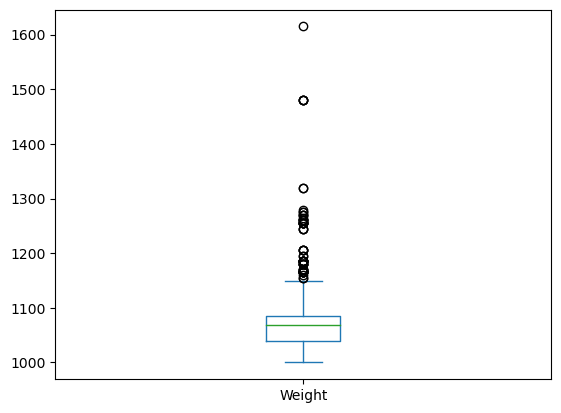

In [32]:
corolla_mod1.Weight.plot(kind='box')

In [33]:
corolla_mod1[corolla_mod1.Weight>1400].index

Index([109, 110, 111, 221, 960], dtype='int64')

In [34]:
corolla_mod1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [35]:
corolla_mod1.loc[[109, 110, 111, 221, 960],'Weight']=1320

<Axes: >

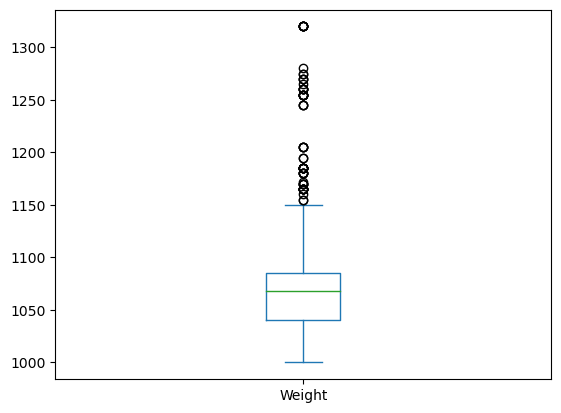

In [36]:
corolla_mod1.Weight.plot(kind='box')

<Axes: >

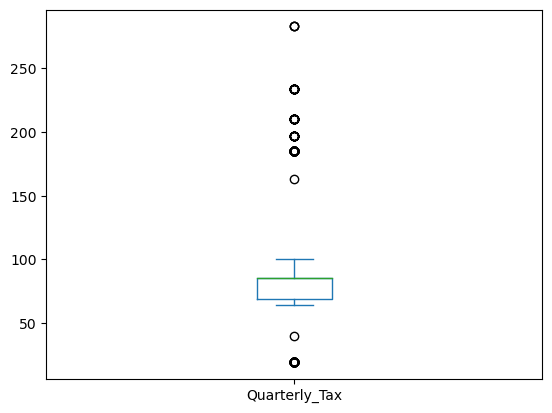

In [37]:
corolla_mod1.Quarterly_Tax.plot(kind='box')

In [38]:
corolla_mod1[corolla_mod1.Quarterly_Tax>250]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
109,32500,4,1,116,2000,5,5,283,1320
110,31000,4,4000,116,2000,5,5,283,1320
111,31275,4,1500,116,2000,5,5,283,1320


In [39]:
corolla_mod1.loc[[109,110,111],'Quarterly_Tax']=corolla_mod1[corolla_mod1.Quarterly_Tax<250].Quarterly_Tax.max()

In [40]:
corolla_mod1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [41]:
corolla_mod2=pd.get_dummies(corolla_mod1,columns=['Doors','Gears'])

In [42]:
corolla_mod2

,Price,Age_08_04,KM,HP,cc,Quarterly_Tax,Weight,Doors_3,Doors_4,Doors_5,Gears_5,Gears_6
0,13500,23,46986,90,2000,210,1165,True,False,False,True,False
1,13750,23,72937,90,2000,210,1165,True,False,False,True,False
2,13950,24,41711,90,2000,210,1165,True,False,False,True,False
3,14950,26,48000,90,2000,210,1165,True,False,False,True,False
4,13750,30,38500,90,2000,210,1170,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,69,1025,True,False,False,True,False
1432,10845,72,19000,86,1300,69,1015,True,False,False,True,False
1433,8500,71,17016,86,1300,69,1015,True,False,False,True,False
1434,7250,70,16916,86,1300,69,1015,True,False,False,True,False


In [43]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla_mod2).fit()

In [44]:
model.rsquared

0.8668698047211181

In [45]:
np.sqrt(model.mse_resid)

1322.4084637575872

In [46]:
model.pvalues

Intercept           9.941015e-19
Doors_3[T.True]     5.346387e-20
Doors_4[T.True]     1.089975e-13
Doors_5[T.True]     2.286242e-19
Gears_5[T.True]     7.615167e-24
Gears_6[T.True]     1.121929e-12
Age_08_04          4.255101e-257
KM                  8.861097e-43
HP                  4.414451e-22
cc                  3.495730e-23
Quarterly_Tax       4.754743e-04
Weight              5.625942e-88
dtype: float64

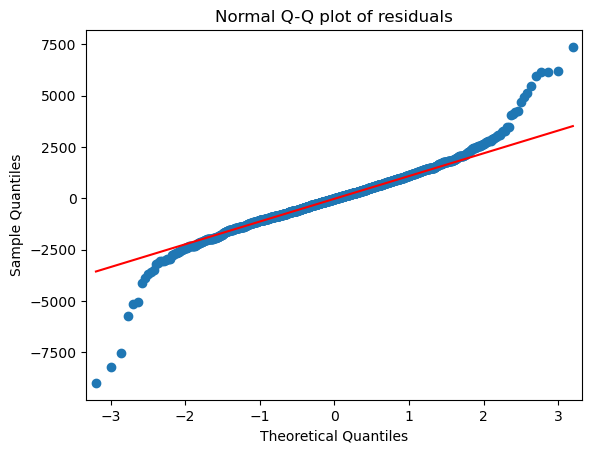

In [47]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

<Axes: >

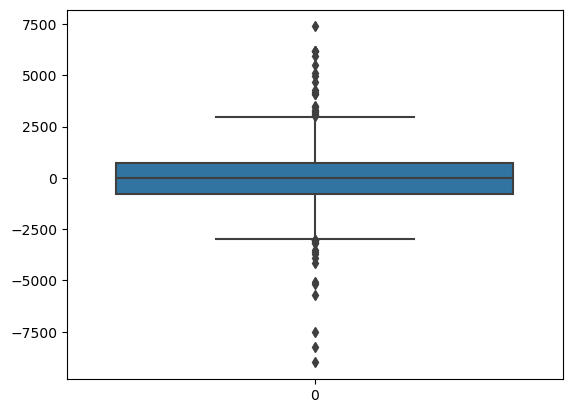

In [48]:
sns.boxplot(model.resid)

<Axes: ylabel='Density'>

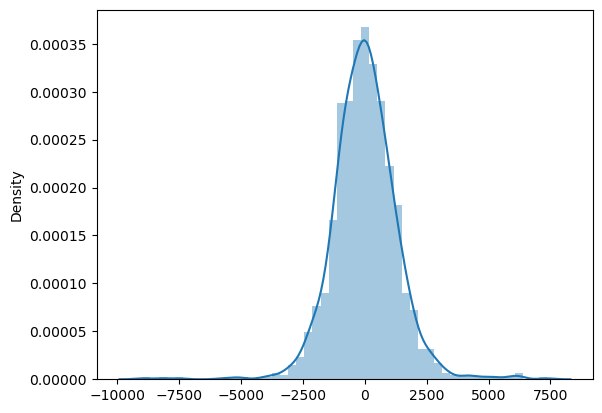

In [49]:
sns.distplot(model.resid)

In [50]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

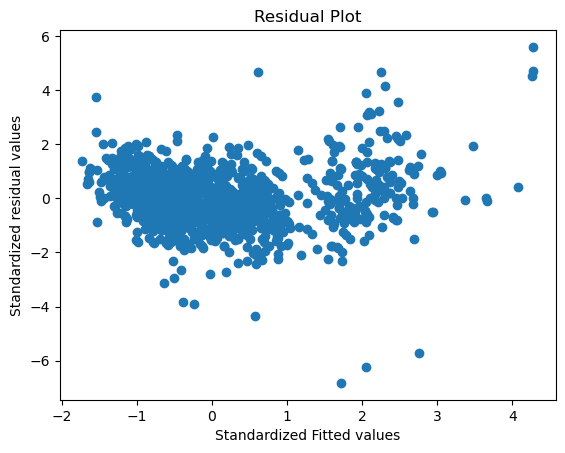

In [51]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [52]:
rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla_mod2).fit().rsquared  
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age_08_04+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla_mod2).fit().rsquared  
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~Age_08_04+KM+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla_mod2).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla_mod2).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

rsq_qt = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Weight',data=corolla_mod2).fit().rsquared  
vif_qt = 1/(1-rsq_qt)

rsq_wt = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax',data=corolla_mod2).fit().rsquared  
vif_wt = 1/(1-rsq_wt)



d1 = {'Variables':['age','km','hp','cc','qt','wt'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_qt,vif_wt]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,age,2.027510
1,km,1.942626
2,hp,1.598012
3,cc,3.333679
4,qt,2.841925
5,wt,3.820249


In [53]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
k = 8
n = 1430
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff
corolla_mod2['c']=c
corolla_mod2=corolla_mod2[corolla_mod2.c<leverage_cutoff]

In [54]:
model2=smf.ols('Price~Age_08_04+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla_mod2).fit()

In [55]:
model2.rsquared

0.8861328520399874

In [56]:
np.sqrt(model2.mse_resid)

1165.3451883512319

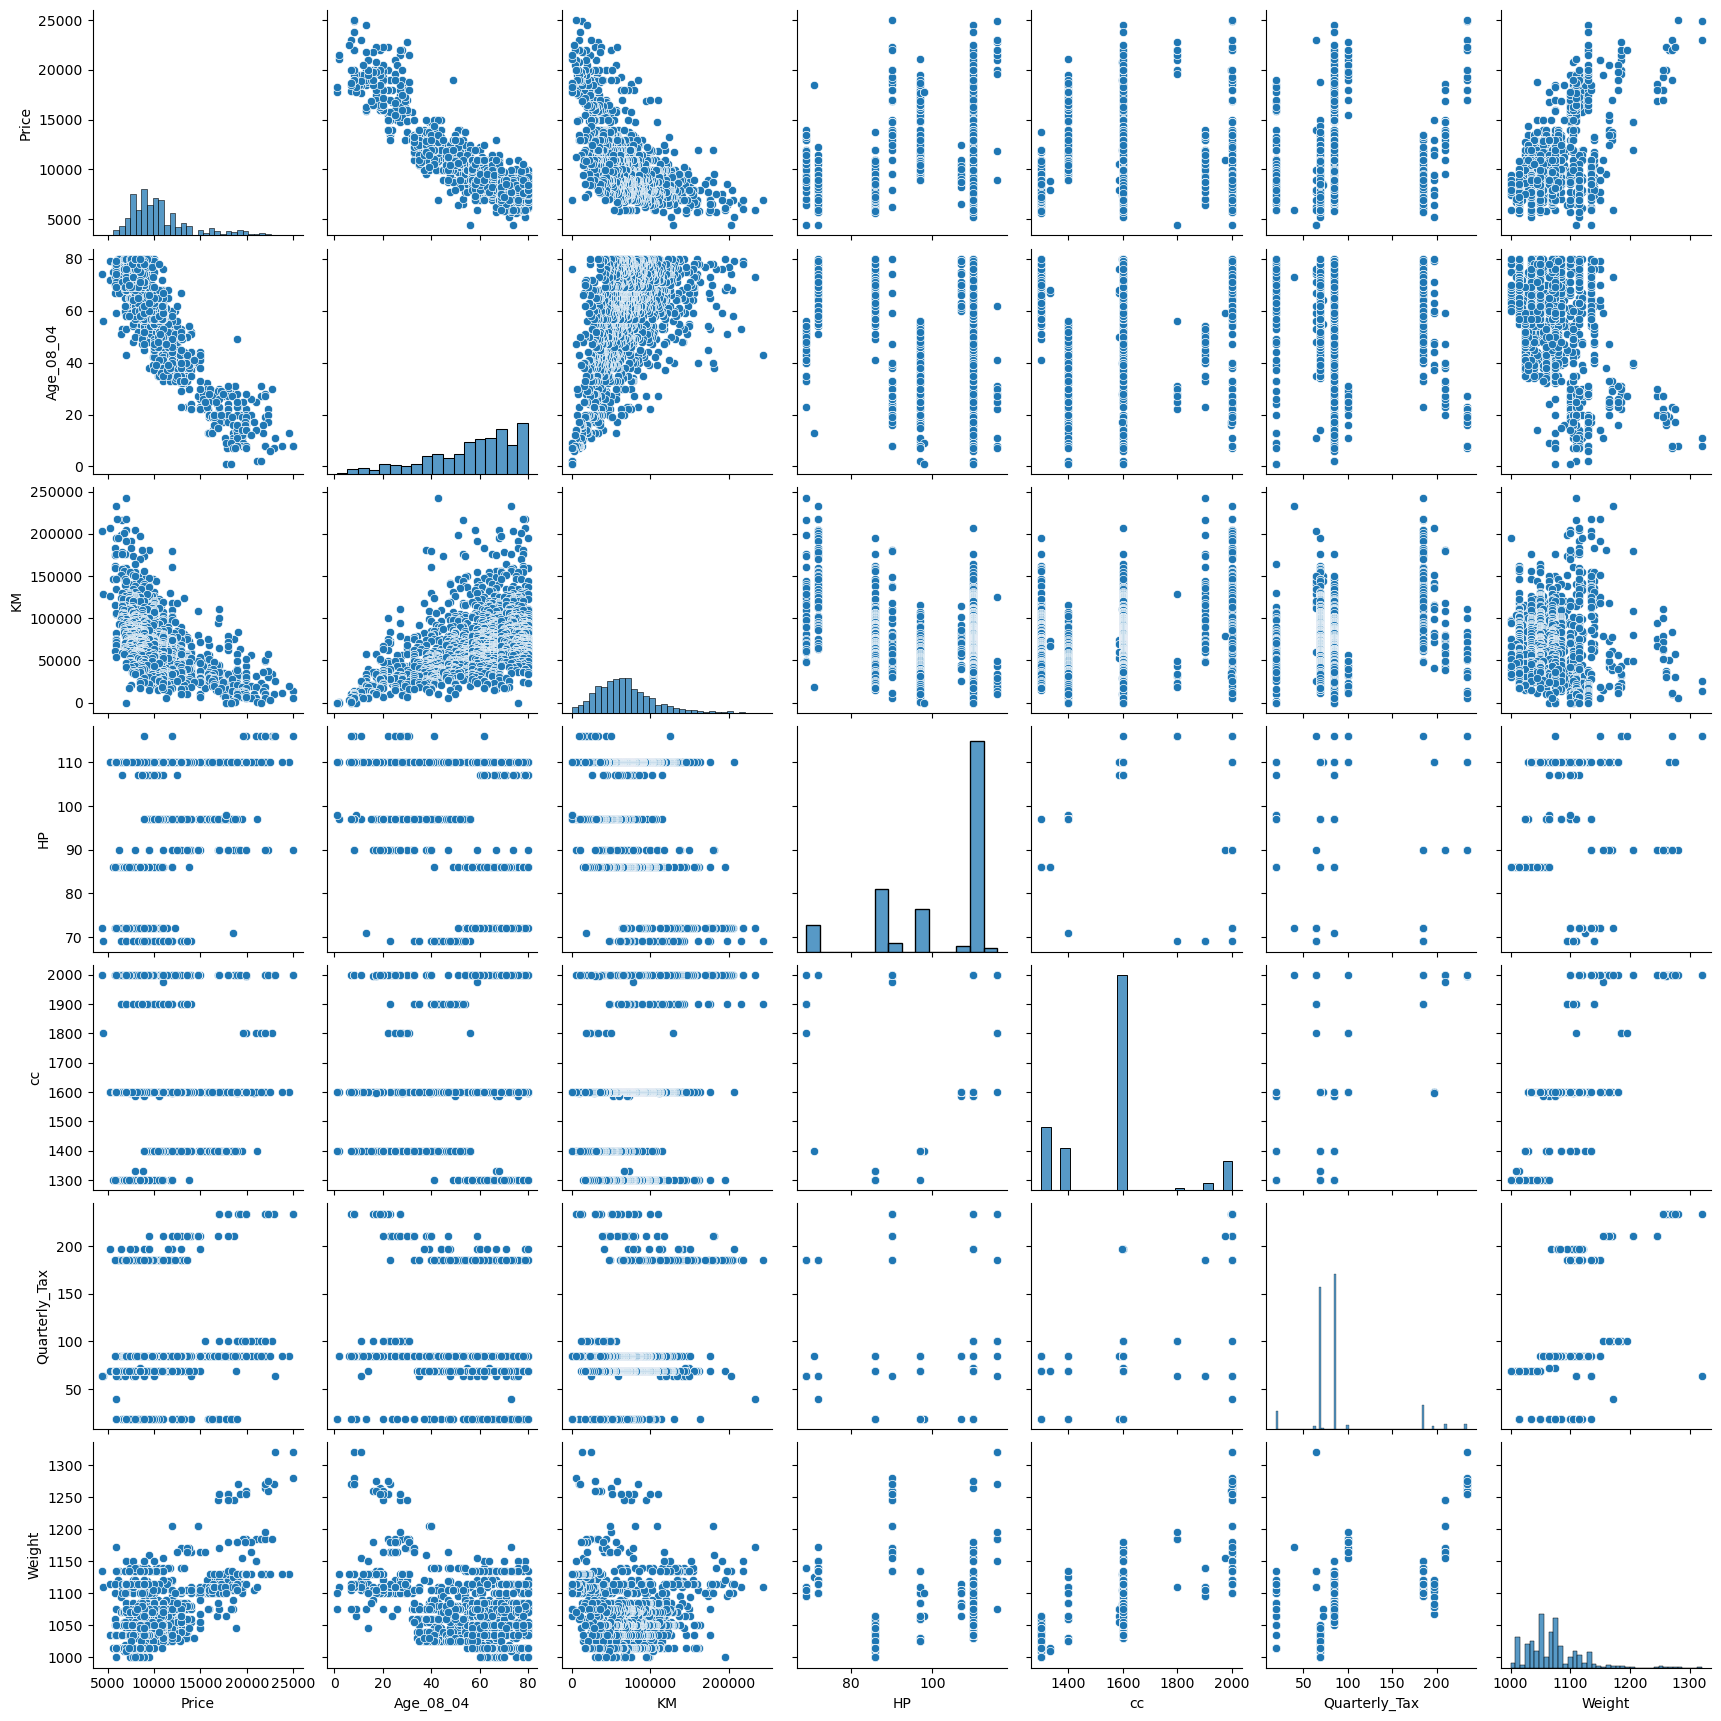

In [57]:
sns.pairplot(corolla_mod2.iloc[:,:7])

In [58]:
corolla_mod2['age_sq']=corolla_mod2.Age_08_04**2
corolla_mod2['age_sqrt']=corolla_mod2.Age_08_04**0.5
corolla_mod2['age_log']=np.log(corolla_mod2.Age_08_04)

,Price,Age_08_04,age_sq,age_sqrt,age_log
Price,1.000000,-0.889720,-0.831338,-0.903487,-0.875386
Age_08_04,-0.889720,1.000000,0.978495,0.988802,0.932978
age_sq,-0.831338,0.978495,1.000000,0.938790,0.851129
age_sqrt,-0.903487,0.988802,0.938790,1.000000,0.974692
age_log,-0.875386,0.932978,0.851129,0.974692,1.000000


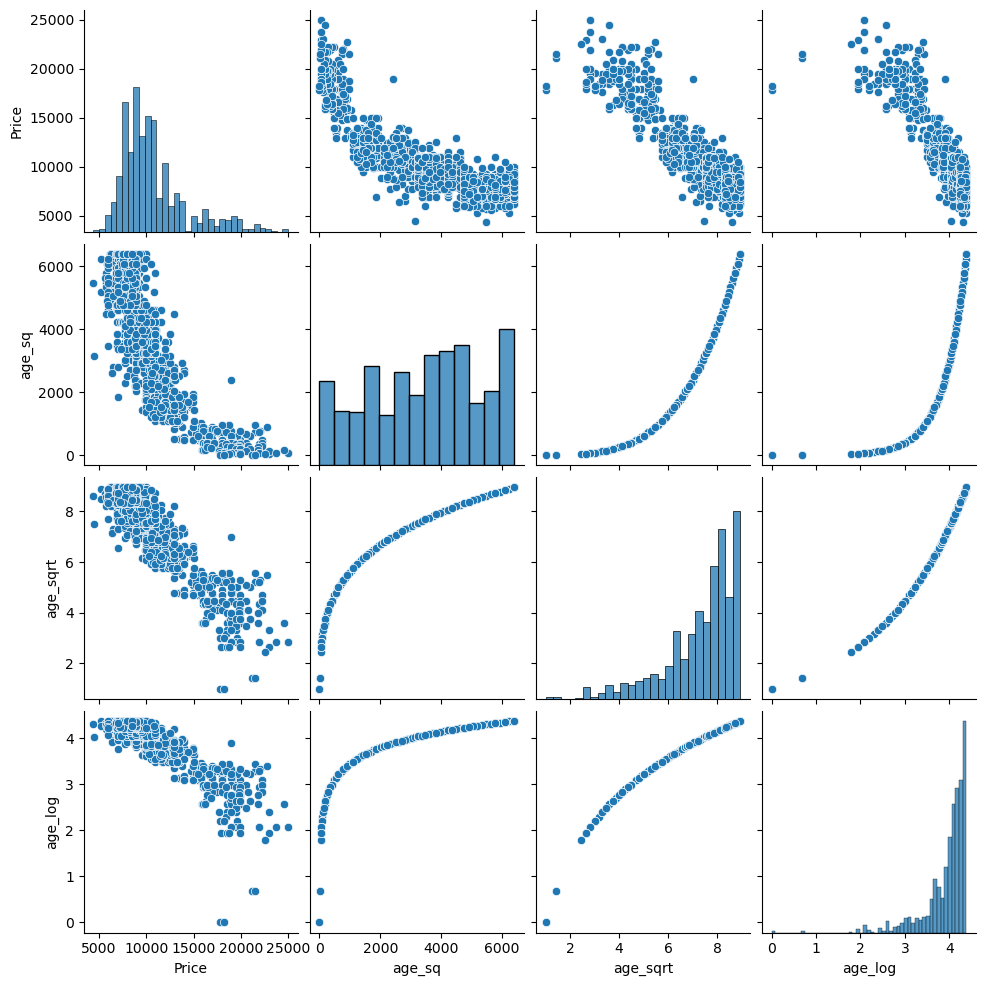

In [59]:
sns.pairplot(corolla_mod2.loc[:,['Price','age_sq','age_sqrt','age_log']])
corolla_mod2.loc[:,['Price','Age_08_04','age_sq','age_sqrt','age_log']].corr()

In [60]:
model3=smf.ols('Price~age_sqrt+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla_mod2).fit()

In [61]:
model3.rsquared

0.8911715408302324

In [62]:
np.sqrt(model3.mse_resid)

1139.269854669019

In [63]:
model3.pvalues

Intercept           7.508554e-07
Doors_3[T.True]     4.610703e-07
Doors_4[T.True]     9.642812e-05
Doors_5[T.True]     4.174071e-08
Gears_5[T.True]     3.150058e-09
Gears_6[T.True]     1.393084e-04
age_sqrt           1.427728e-287
KM                  1.032597e-47
HP                  2.361587e-17
cc                  9.929305e-22
Quarterly_Tax       1.742867e-01
Weight              4.059190e-81
dtype: float64

,Price,KM,km_sq,km_sqrt,km_log
Price,1.000000,-0.573746,-0.442879,-0.635856,-0.521475
KM,-0.573746,1.000000,0.944374,0.972243,0.669020
km_sq,-0.442879,0.944374,1.000000,0.852059,0.514809
km_sqrt,-0.635856,0.972243,0.852059,1.000000,0.789354
km_log,-0.521475,0.669020,0.514809,0.789354,1.000000


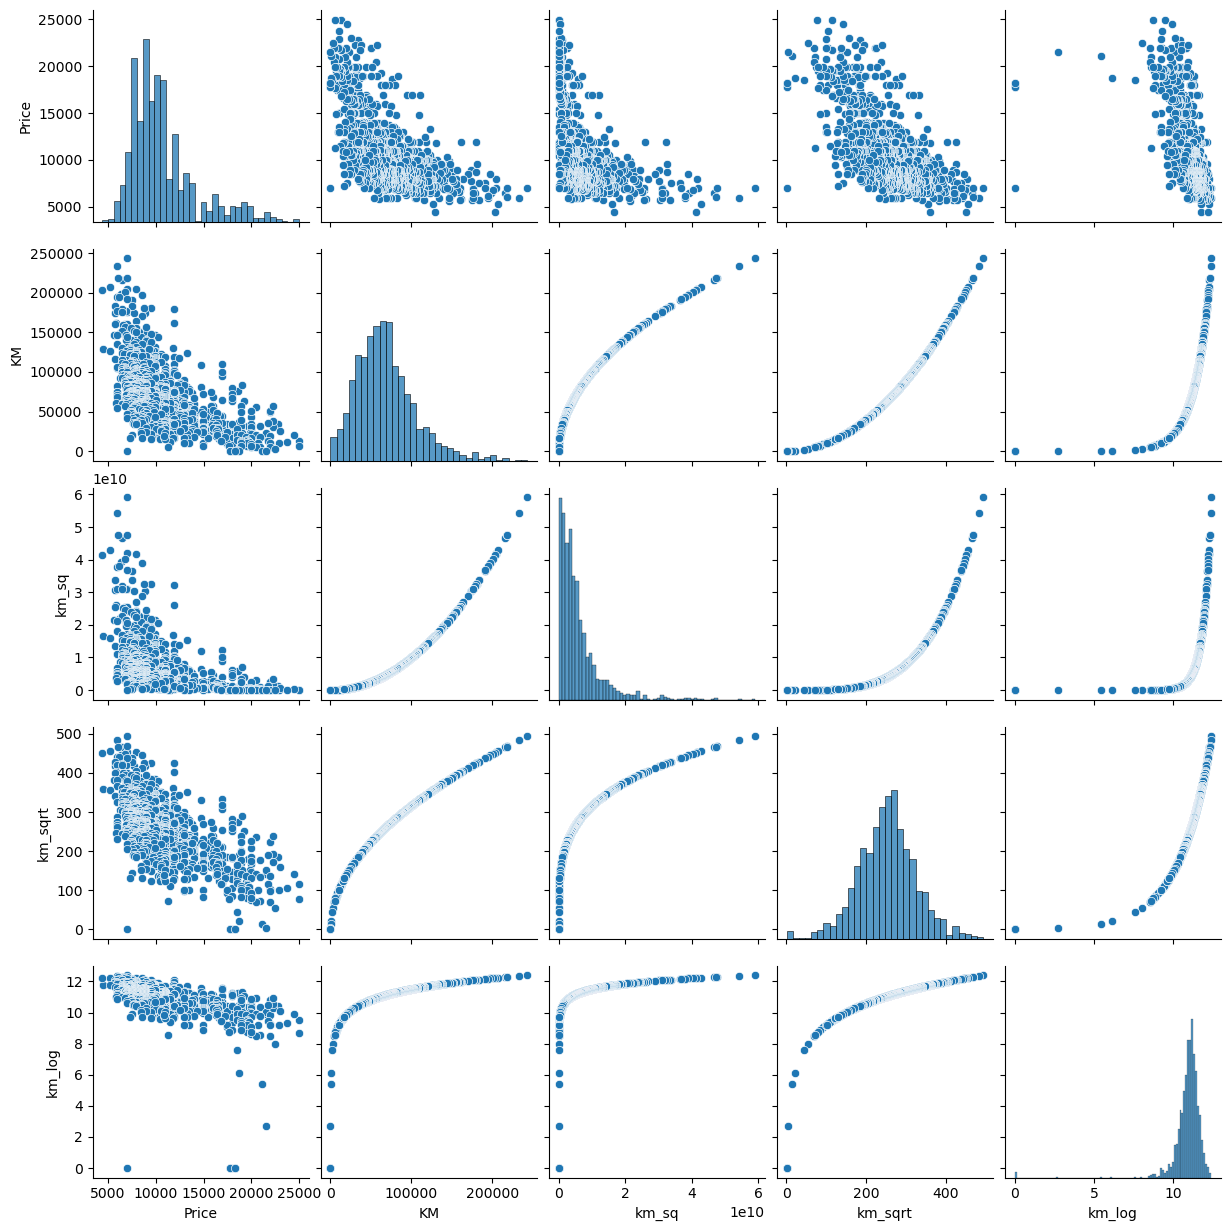

In [64]:
corolla_mod2['km_sq']=corolla_mod2.KM**2
corolla_mod2['km_sqrt']=corolla_mod2.KM**0.5
corolla_mod2['km_log']=np.log(corolla_mod2.KM)
sns.pairplot(corolla_mod2.loc[:,['Price','KM','km_sq','km_sqrt','km_log']])
corolla_mod2.loc[:,['Price','KM','km_sq','km_sqrt','km_log']].corr()

,Price,KM,km_sqrt,km_sqrt4,km_sqrt3,km_sqrt2
Price,1.000000,-0.573746,-0.635856,-0.643545,-0.645543,-0.635370
KM,-0.573746,1.000000,0.972243,0.954890,0.927716,0.882168
km_sqrt,-0.635856,0.972243,1.000000,0.997594,0.987602,0.961879
km_sqrt4,-0.643545,0.954890,0.997594,1.000000,0.996052,0.978083
km_sqrt3,-0.645543,0.927716,0.987602,0.996052,1.000000,0.992604
km_sqrt2,-0.635370,0.882168,0.961879,0.978083,0.992604,1.000000


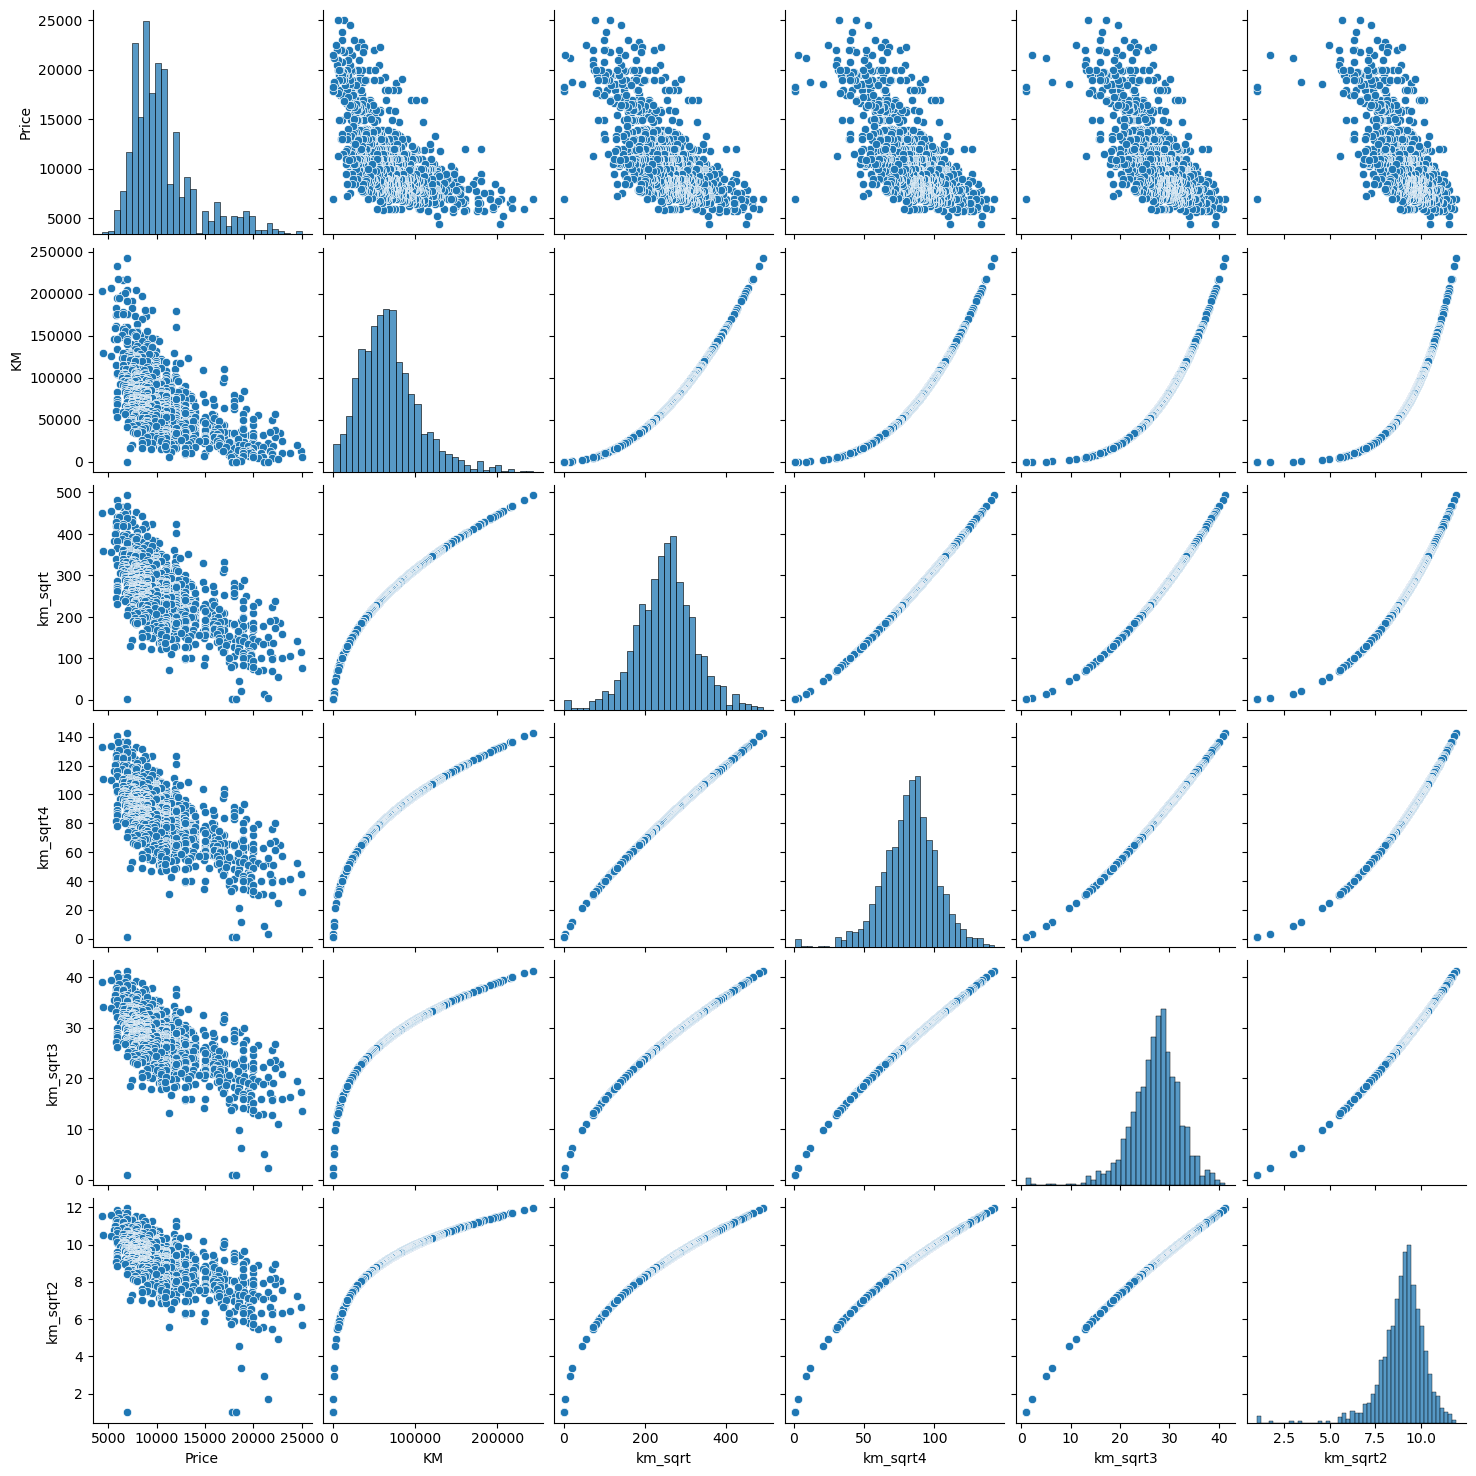

In [65]:
corolla_mod2['km_sqrt4']=corolla_mod2.KM**0.4
corolla_mod2['km_sqrt3']=corolla_mod2.KM**0.3
corolla_mod2['km_sqrt2']=corolla_mod2.KM**0.2

sns.pairplot(corolla_mod2.loc[:,['Price','KM','km_sqrt','km_sqrt4','km_sqrt3','km_sqrt2']])
corolla_mod2.loc[:,['Price','KM','km_sqrt','km_sqrt4','km_sqrt3','km_sqrt2']].corr()

In [66]:
model4=smf.ols('Price~age_sqrt+km_sqrt+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla_mod2).fit()
model4_sqrt4=smf.ols('Price~age_sqrt+km_sqrt4+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla_mod2).fit()
model4_sqrt3=smf.ols('Price~age_sqrt+km_sqrt3+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla_mod2).fit()
model4_sqrt2=smf.ols('Price~age_sqrt+km_sqrt2+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=corolla_mod2).fit()

In [67]:
print(model4.rsquared,model4_sqrt4.rsquared,model4_sqrt3.rsquared,model4_sqrt2.rsquared,sep='\n')
print(np.sqrt(model4.mse_resid),np.sqrt(model4_sqrt4.mse_resid),np.sqrt(model4_sqrt3.mse_resid),np.sqrt(model4_sqrt2.mse_resid))

0.8879321995323827
0.8862335105290584
0.8837855604974645
0.8804157954188274
1156.1010348790628 1164.829992251343 1177.2953043189143 1194.2418204512153


In [68]:
model4.rsquared

0.8879321995323827

In [69]:
print(np.sqrt(model4.mse_resid),np.sqrt(model4_sqrt4.mse_resid),np.sqrt(model4_sqrt3.mse_resid),np.sqrt(model4_sqrt2.mse_resid))

1156.1010348790628 1164.829992251343 1177.2953043189143 1194.2418204512153


<Axes: >

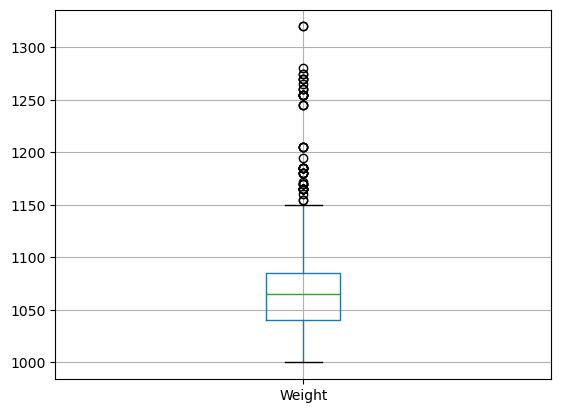

In [70]:
corolla_mod2[['Weight']].boxplot()

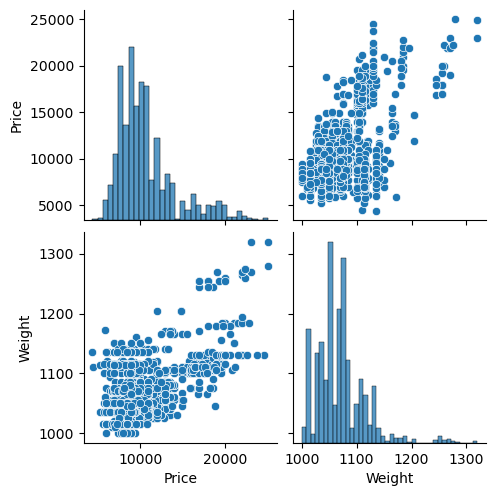

In [71]:
sns.pairplot(corolla_mod2.loc[:,['Price','Weight']])

,Price,Weight,wt_sq,wt_sqrt,wt_log,wt_sq3,wt_sq4
Price,1.000000,0.587669,0.589786,0.586267,0.584655,0.590897,0.590903
Weight,0.587669,1.000000,0.999174,0.999804,0.999229,0.996592,0.992119
wt_sq,0.589786,0.999174,1.000000,0.998173,0.996810,0.999120,0.996387
wt_sqrt,0.586267,0.999804,0.998173,1.000000,0.999811,0.994765,0.989450
wt_log,0.584655,0.999229,0.996810,0.999811,1.000000,0.992593,0.986457
wt_sq3,0.590897,0.996592,0.999120,0.994765,0.992593,1.000000,0.999071
wt_sq4,0.590903,0.992119,0.996387,0.989450,0.986457,0.999071,1.000000


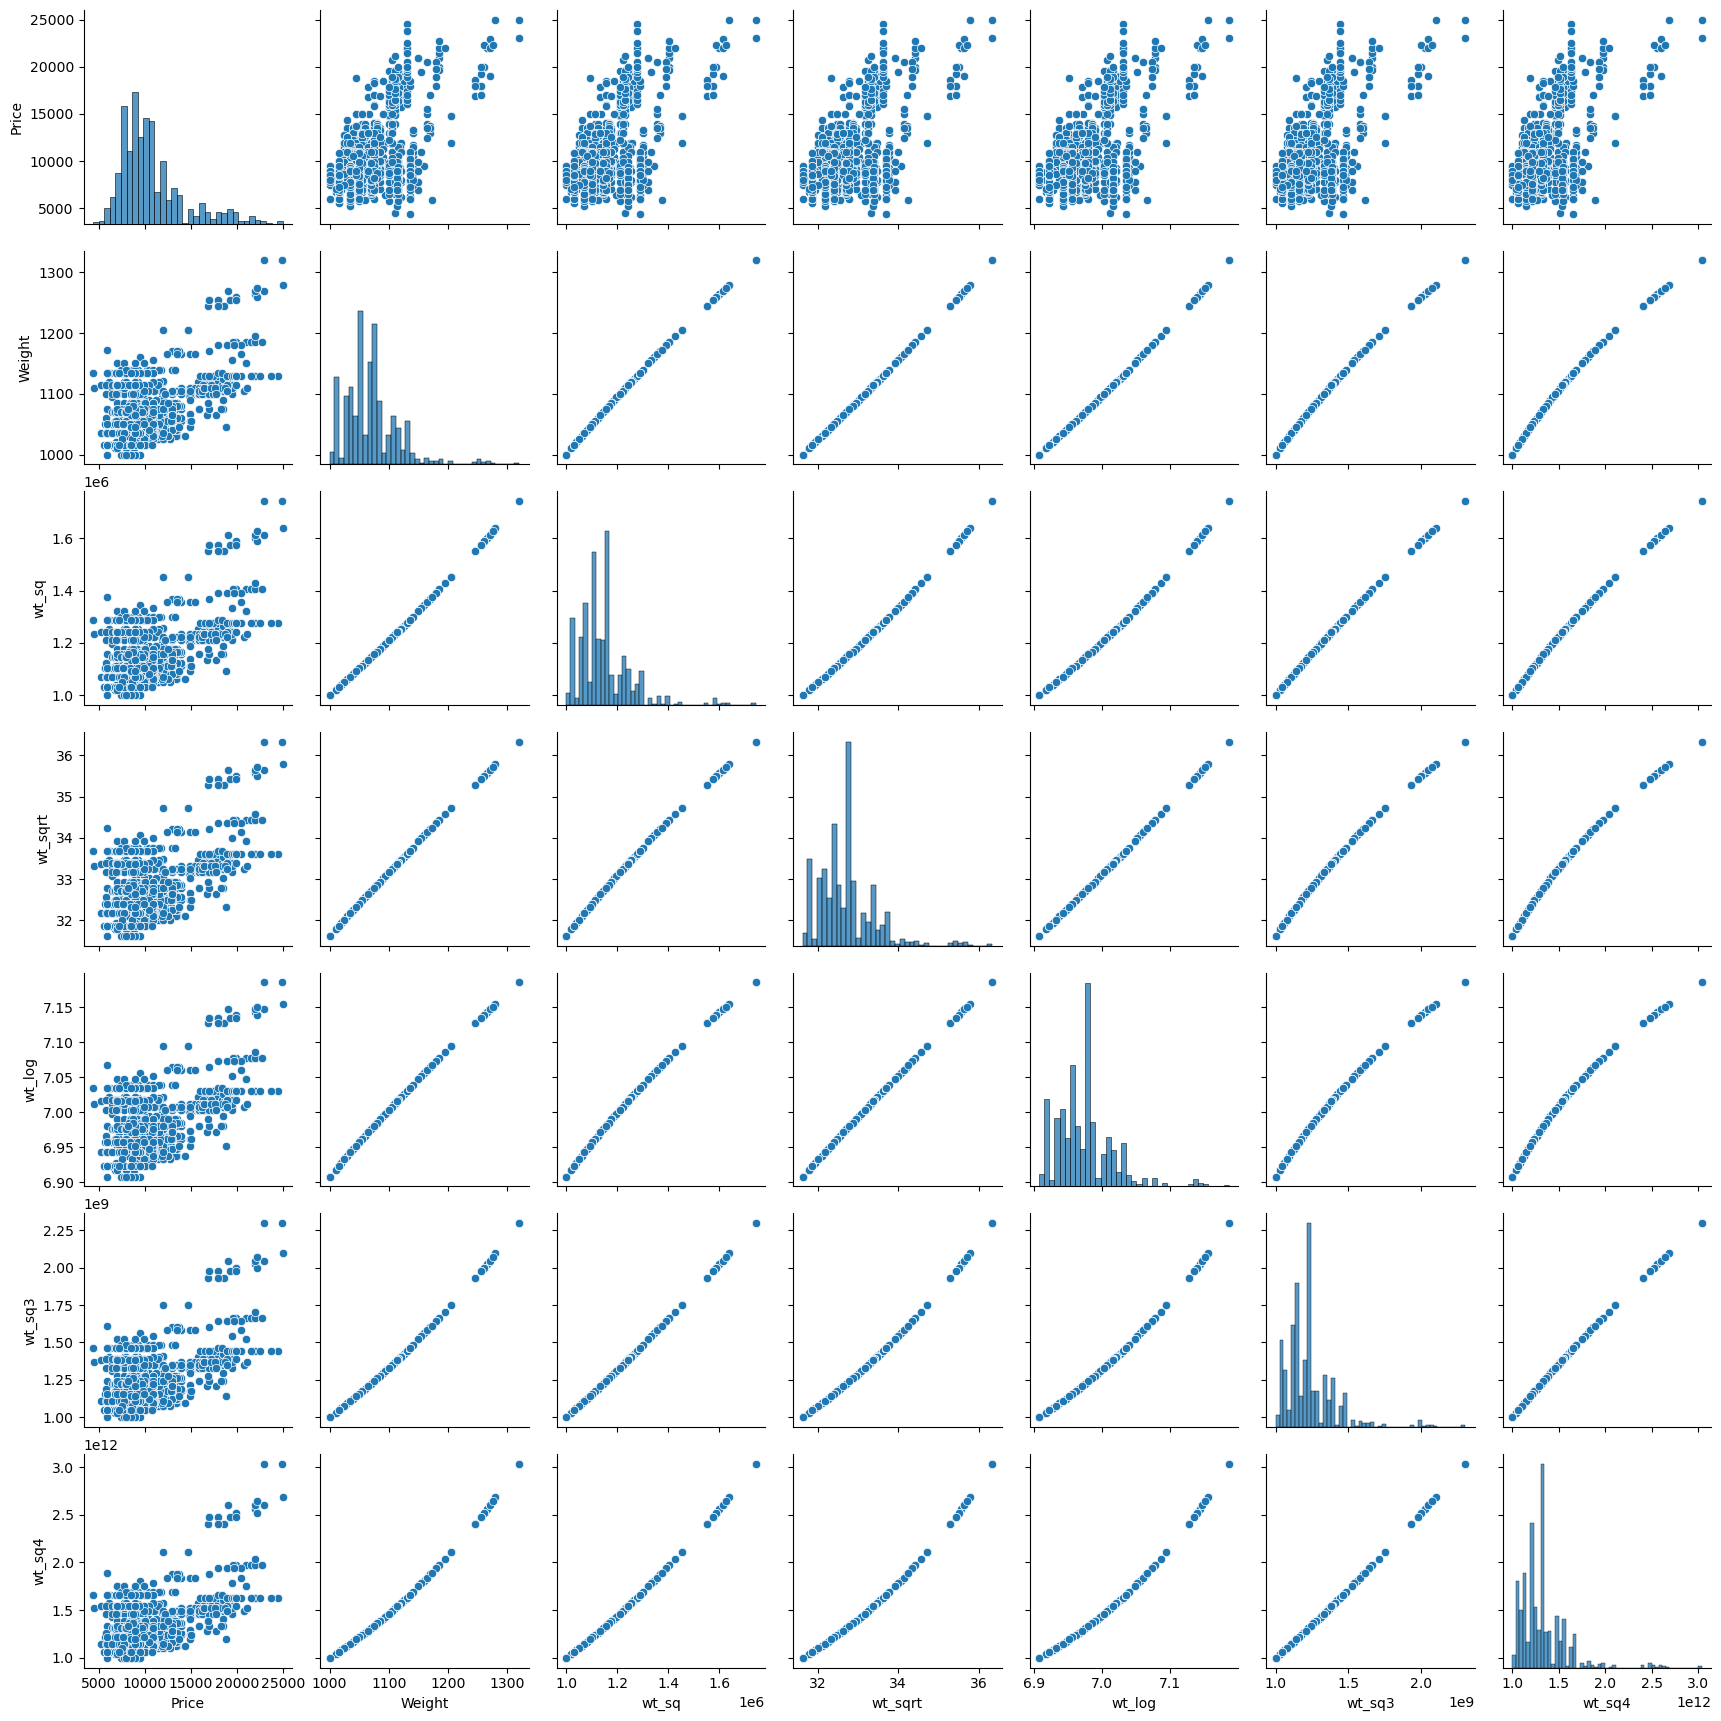

In [72]:
corolla_mod2['wt_sq']=corolla_mod2.Weight**2
corolla_mod2['wt_sqrt']=corolla_mod2.Weight**0.5
corolla_mod2['wt_log']=np.log(corolla_mod2.Weight)
corolla_mod2['wt_sq3']=corolla_mod2.Weight**3
corolla_mod2['wt_sq4']=corolla_mod2.Weight**4
sns.pairplot(corolla_mod2.loc[:,['Price','Weight','wt_sq','wt_sqrt','wt_log','wt_sq3','wt_sq4']])
corolla_mod2.loc[:,['Price','Weight','wt_sq','wt_sqrt','wt_log','wt_sq3','wt_sq4']].corr()

In [73]:
model5_sq=smf.ols('Price~age_sqrt+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+wt_sq',data=corolla_mod2).fit()
model5_sq3=smf.ols('Price~age_sqrt+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+wt_sq3',data=corolla_mod2).fit()
model5_sq4=smf.ols('Price~age_sqrt+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+wt_sq4',data=corolla_mod2).fit()

In [74]:
print(model4.rsquared,model5_sq.rsquared,model5_sq3.rsquared,model5_sq4.rsquared)

0.8879321995323827 0.8917229972708849 0.8918634395175842 0.8916081907584812


In [75]:
print(np.sqrt(model3.mse_resid),np.sqrt(model4.mse_resid),np.sqrt(model5_sq.mse_resid),np.sqrt(model5_sq3.mse_resid),np.sqrt(model5_sq4.mse_resid))

1139.269854669019 1156.1010348790628 1136.3797301337715 1135.6425121491022 1136.982024368951


In [76]:
model5_sq3.params

Intercept          8213.842000
Doors_3[T.True]    2706.571904
Doors_4[T.True]    2999.207818
Doors_5[T.True]    2508.065175
Gears_5[T.True]    3724.297619
Gears_6[T.True]    4489.544381
age_sqrt          -1513.163792
KM                   -0.016888
HP                   27.334082
cc                   -2.697448
Quarterly_Tax         1.168268
wt_sq3                0.000008
dtype: float64

In [77]:
model5_sq3.pvalues

Intercept          1.753607e-135
Doors_3[T.True]    3.956018e-128
Doors_4[T.True]    4.656354e-115
Doors_5[T.True]     2.831719e-82
Gears_5[T.True]    1.454852e-115
Gears_6[T.True]     4.754535e-97
age_sqrt           4.916381e-299
KM                  1.163811e-46
HP                  6.132965e-18
cc                  2.223676e-18
Quarterly_Tax       3.944190e-01
wt_sq3              4.549544e-83
dtype: float64

In [78]:
model5_sq3.rsquared

0.8918634395175842

In [79]:
np.sqrt(model5_sq3.mse_resid)

1135.6425121491022

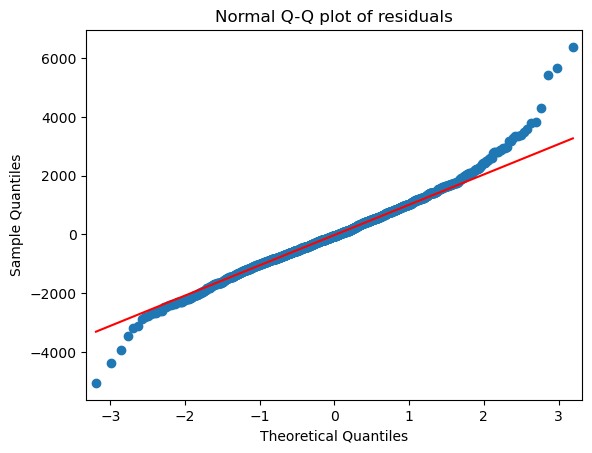

In [80]:
qqplot=sm.qqplot(model5_sq3.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

<Axes: >

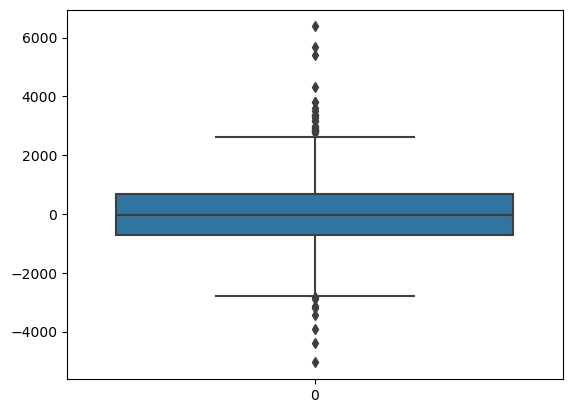

In [81]:
sns.boxplot(model5_sq3.resid)

<Axes: ylabel='Density'>

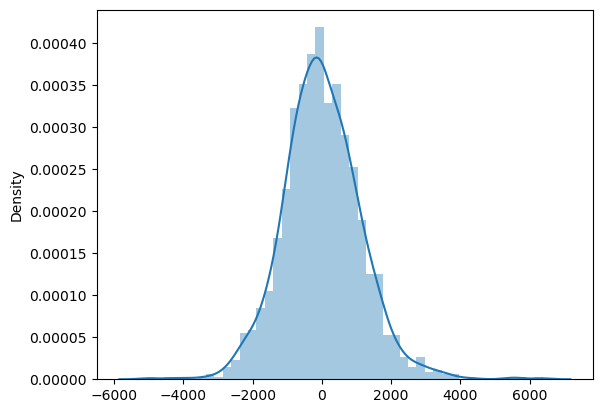

In [82]:
sns.distplot(model5_sq3.resid)

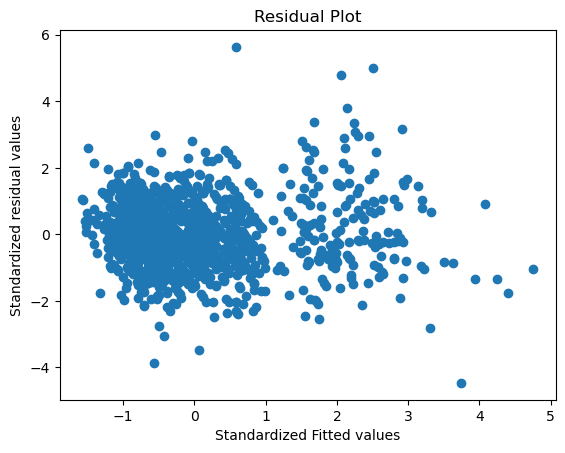

In [83]:
plt.scatter(get_standardized_values(model5_sq3.fittedvalues),
            get_standardized_values(model5_sq3.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [84]:
model_finalised=model5_sq3

## Prediction Of Data

In [85]:
new=pd.DataFrame(columns=['Age_08_04', 'KM', 'HP', 'cc', 'Doors_3','Doors_4', 'Doors_5','Gears_5','Gears_6','Quarterly_Tax', 'Weight'])
#new.columns=['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears','Quarterly_Tax', 'Weight']
new.loc[0]=[21,27543,100,1800,0,1,0,1,0,210,1200]
new.loc[1]=[36,57543,120,1900,0,1,0,1,0,240,1000]
new['age_sqrt']=new.Age_08_04**0.5
new['wt_sq3']=new.Weight**3
new

,Age_08_04,KM,HP,cc,Doors_3,Doors_4,Doors_5,Gears_5,Gears_6,Quarterly_Tax,Weight,age_sqrt,wt_sq3
0,21,27543,100,1800,0,1,0,1,0,210,1200,4.582576,1728000000
1,36,57543,120,1900,0,1,0,1,0,240,1000,6.000000,1000000000


In [86]:
model_finalised.predict(new)

0    19293.454216
1    11210.841916
dtype: float64